# ----------------------------------
# - __1st Part : Study of the Dataset__ -
# ----------------------------------

## Import Matplotlib, numpy, pandas and scipy to make all the computation in this notebook

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
pd.options.mode.chained_assignment = None


<br>

## __Q1 : Delete all non-wind-related and time-related features__

Here, the wind-related and time-related features are 
1. wind_direction_100m
2. wind_direction_10m
3. wind_speed_100m
4. wind_speed_10m
5. period_end

And then we display the firs rows of the new dataset to see the result

In [30]:
file_path = 'csv_Nimes_43.836699_4.360054_fixed_23_180_PT30M.csv'
Df = pd.read_csv(file_path)

#select only wind-related and time-related features
Lst_columns = [
    'wind_direction_100m', 'wind_direction_10m', 
    'wind_speed_100m', 'wind_speed_10m', 
    'period_end'
]
NewDf = Df[Lst_columns]

#display the first few rows of the filtered dataset
print(NewDf.head())


   wind_direction_100m  wind_direction_10m  wind_speed_100m  wind_speed_10m  \
0                  106                  83              4.7             1.9   
1                  104                  81              4.6             1.8   
2                  104                  80              4.5             1.8   
3                  104                  78              4.3             1.8   
4                  102                  73              4.0             1.7   

             period_end  
0  2014-01-01T00:30:00Z  
1  2014-01-01T01:00:00Z  
2  2014-01-01T01:30:00Z  
3  2014-01-01T02:00:00Z  
4  2014-01-01T02:30:00Z  


<br>

## __Q2 : sub-dataset corresponding to exactly one year__

### Function: select_year

This function filters and returns data for a specified year from a DataFrame.

- **Convert 'period_end' to datetime format**: 
  This ensures that the 'period_end' column is in the correct datetime format for filtering.

- **Define the start and end dates for the specified year**: 
  The `start_date` and `end_date` variables define the range of dates to filter the data.

- **Extract data for the specified year**: 
  The `one_year_data` variable stores rows from `NewDf` where 'period_end' falls within the start and end dates.

The function returns the filtered data for the specified year.

### Example Usage

The example usage prints the data for the year 2015:
```python
print(select_year(2015))



In [31]:
def select_year(year):
    #convert 'period_end' to datetime
    NewDf['period_end'] = pd.to_datetime(NewDf['period_end'])

    #define start and end date for the given year
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    
    #extract data for the specified year
    one_year_data = NewDf[(NewDf['period_end'] >= start_date)&(NewDf['period_end'] <= end_date)]

    return one_year_data

print(select_year(2015))

       wind_direction_100m  wind_direction_10m  wind_speed_100m  \
17519                   14                   9              8.4   
17520                   13                   8              8.4   
17521                    9                   5              8.2   
17522                    9                   5              8.0   
17523                   10                   7              7.7   
...                    ...                 ...              ...   
34987                  146                 139              5.2   
34988                  145                 137              5.2   
34989                  146                 137              5.3   
34990                  144                 135              5.4   
34991                  141                 132              5.6   

       wind_speed_10m                period_end  
17519             4.5 2015-01-01 00:00:00+00:00  
17520             4.5 2015-01-01 00:30:00+00:00  
17521             4.5 2015-01-01 01:00:00+00:

<br>

## __Q3 : plot of wind-related features as a function of time__

### Function: plot_Wind_and_speed

This function plots wind-related features for a specified year, including wind direction and speed at 100m and 10m heights.

- **Data Selection**: 
  Uses the `select_year` function to filter data for the specified year.

- **Colormap Definition**: 
  Defines a colormap for the plots.

- **Polar Plot for Wind Direction at 100m**: 
  Creates a polar plot showing wind direction at 100m height, with wind speed normalized for color intensity.

- **Polar Plot for Wind Direction at 10m**: 
  Creates a similar polar plot for wind direction at 10m height.

- **Time Series Plot for Wind Speed**: 
  Plots wind speed over time at both 100m and 10m heights on a standard x-y plot.

- **Layout Adjustment and Plot Display**: 
  Adjusts the layout for better spacing and displays the plot.

### Example Usage

The example usage generates plots for the year 2015:
```python
plot_Wind_and_speed(2015)


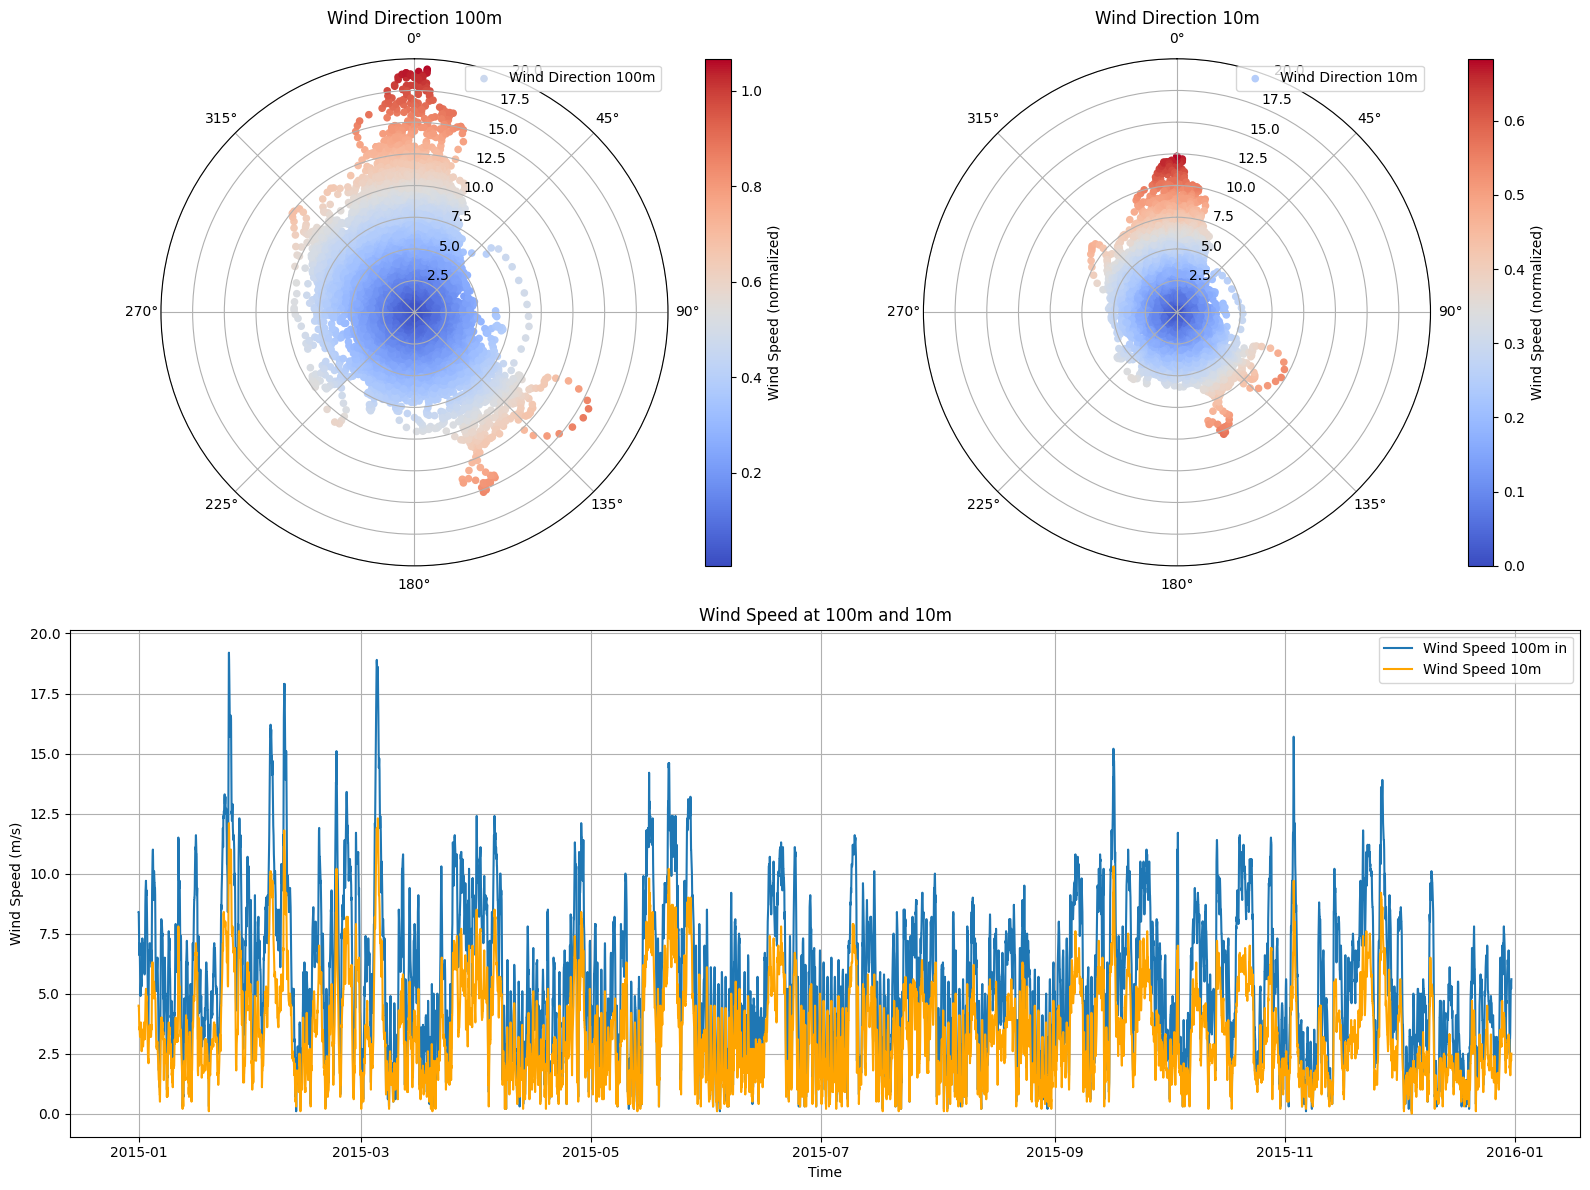

In [32]:
def plot_Wind_and_speed(year):
    Df_one_year = select_year(year)


    # Define a colormap
    cmap = plt.get_cmap('coolwarm')

    plt.figure(figsize=(16, 12))

    # Polar plot for wind_direction_100m
    ax1 = plt.subplot(2, 2, 1, projection='polar')
    angles_100m = np.deg2rad(Df_one_year['wind_direction_100m'])
    colors_100m = Df_one_year['wind_speed_100m'] / 18  # Normalize wind speed for colormap
    sc1 = ax1.scatter(angles_100m, Df_one_year['wind_speed_100m'], c=colors_100m, cmap=cmap, s=20, alpha=1.0)
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    ax1.set_title('Wind Direction 100m')
    ax1.set_ylim(0, 20)
    plt.colorbar(sc1, ax=ax1, label='Wind Speed (normalized)')
    ax1.legend(['Wind Direction 100m'])

    # Polar plot for wind_direction_10m
    ax2 = plt.subplot(2, 2, 2, projection='polar')
    angles_10m = np.deg2rad(Df_one_year['wind_direction_10m'])
    colors_10m = Df_one_year['wind_speed_10m'] / 18  # Normalize wind speed for colormap
    sc2 = ax2.scatter(angles_10m, Df_one_year['wind_speed_10m'], c=colors_10m, cmap=cmap, s=20, alpha=1.0)
    ax2.set_theta_zero_location('N')
    ax2.set_theta_direction(-1)
    ax2.set_title('Wind Direction 10m')
    ax2.set_ylim(0, 20)
    plt.colorbar(sc2, ax=ax2, label='Wind Speed (normalized)')
    ax2.legend(['Wind Direction 10m'])

    clear_blue = '#1f77b4'  

    #plot wind speed for both heights in the same plot
    plt.subplot(2, 1, 2)
    plt.plot(Df_one_year['period_end'], Df_one_year['wind_speed_100m'], label='Wind Speed 100m in', color=clear_blue)
    plt.plot(Df_one_year['period_end'], Df_one_year['wind_speed_10m'], label='Wind Speed 10m', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (m/s)')
    plt.title(f'Wind Speed at 100m and 10m')
    plt.grid(True)
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

plot_Wind_and_speed(2015)

<br>

## __Q4 : the number of hours during which the wind was not blowing__

### Function: num_day_blowing

This function calculates the total number of hours during a specified year when the wind was not blowing.

- **Select Yearly Data**: Uses the `select_year` function to filter data for the specified year.
- **Filter for No Wind**: Identifies periods where both wind speeds (at 100m and 10m) are zero.
- **Calculate No-Wind Hours**: Multiplies the number of no-wind periods by 0.5 (since each period represents 30 minutes) to get the total hours without wind.
- **Output**: Prints the total number of hours without wind for the specified year.

### Function: num_day_blowing_threshold

This function calculates the number of hours during a specified year when the wind was not blowing, using a threshold for low wind speed.

- **Select Yearly Data**: Uses the `select_year` function to filter data for the specified year.
- **Threshold Definition**: Assumes the wind is not blowing if both wind speeds (at 100m and 10m) are below 2 meters per second. This threshold is chosen because wind turbines produce minimal energy below this speed, making them effectively non-operational.
- **Filter for Low Wind**: Identifies periods where both wind speeds are below the threshold.
- **Calculate No-Wind Hours**: Multiplies the number of low-wind periods by 0.5 to get the total hours without wind.
- **Calculate Total and Percentage**: Calculates the total number of hours in the year and the percentage of hours with no wind.
- **Output**: Prints the total number of hours without wind and the percentage of the total year this represents.

### Example Usage

The example usage runs both functions for the year 2015:
```python
num_day_blowing(2015)
print("\n")
num_day_blowing_threshold(2015)


n.b : The initial function (num_day_blowing) resulted in zero no-wind hours because it only counted periods where wind speeds were exactly zero. To provide a more practical measure, I created a second function (num_day_blowing_threshold), which considers wind speeds below 2 meters per second as effectively no wind, since turbines produce negligible energy at these speeds.


In [33]:
def num_day_blowing(year):
    Df_one_year = select_year(year)
    #calculate the number of hours during which the wind was not blowing
    #we assume wind is not blowing when both wind speeds are zero

    #filter rows where both wind speeds are zero
    no_wind_data = Df_one_year[(Df_one_year['wind_speed_100m'] == 0) & (Df_one_year['wind_speed_10m'] == 0)]

    #calculate the number of hours
    #since the dataset has a period of PT30M (30 minutes), each row represents 0.5 hours
    hours_no_wind = len(no_wind_data) * 0.5

    print(f'The number of hours during which the wind was not blowing: {hours_no_wind}h')

    # Suppress SettingWithCopyWarning
    pd.options.mode.chained_assignment = None


def num_day_blowing_threshold(year, threshold=2):
    Df_one_year = select_year(year)
    
    #in this function we assume the wind is not blowing when both wind speeds are below the threshold of 2 meters per second.
    #The threshold of 2 meters per second is chosen because below this speed, the wind turbine is unlikely
    #to produce any amount of energy, effectively making it non-operational.

    #filter rows where both wind speeds are below the threshold
    no_wind_data = Df_one_year[(Df_one_year['wind_speed_100m'] < threshold) & (Df_one_year['wind_speed_10m'] < threshold)]
    
    #calculate the number of hours
    #since the dataset has a period of 30 minutes, each row represents 0.5 hours
    hours_no_wind = len(no_wind_data) * 0.5

    #calculate the total number of hours in the year
    total_hours_in_year = len(Df_one_year) * 0.5
    
    #calculate the percentage of hours with no wind
    percentage_no_wind = (hours_no_wind / total_hours_in_year) * 100

    print(f'The number of hours during which the wind was not blowing (below {threshold} m/s): {hours_no_wind}h')
    print(f'This represents {percentage_no_wind:.2f}% of the total number of hours in the year {year}.')
    


num_day_blowing(2015)

print("\n")
num_day_blowing_threshold(2015)


The number of hours during which the wind was not blowing: 0.0h


The number of hours during which the wind was not blowing (below 2 m/s): 1051.5h
This represents 12.04% of the total number of hours in the year 2015.


<br>

## __Q5 : Plot of monthly-averaged wind-related features as a function of the number of the month__

### Function: plot_monthly_averages

This function plots the monthly-averaged wind-related features for a specified year, including wind speed and direction at 100m and 10m heights.

- **Extract Yearly Data**: 
  Uses the `select_year` function to filter data for the specified year.

- **Extract Month**: 
  Adds a 'month' column to the data by extracting the month from the 'period_end' timestamp.

- **Calculate Monthly Averages**: 
  Groups the data by month and calculates the mean values for numeric columns, resulting in monthly averages.

- **Plot Wind Speed**: 
  Creates a subplot for wind speed at 100m and 10m heights, plotting the monthly averages with different colors and line widths.

- **Plot Wind Direction at 100m**: 
  Creates a subplot for wind direction at 100m height, plotting the monthly averages.

- **Plot Wind Direction at 10m**: 
  Creates a subplot for wind direction at 10m height, plotting the monthly averages.

- **Layout Adjustment and Plot Display**: 
  Adjusts the layout for better spacing and displays the plots.

### Example Usage

The example usage generates plots for the year 2015:
```python
plot_monthly_averages(2015)





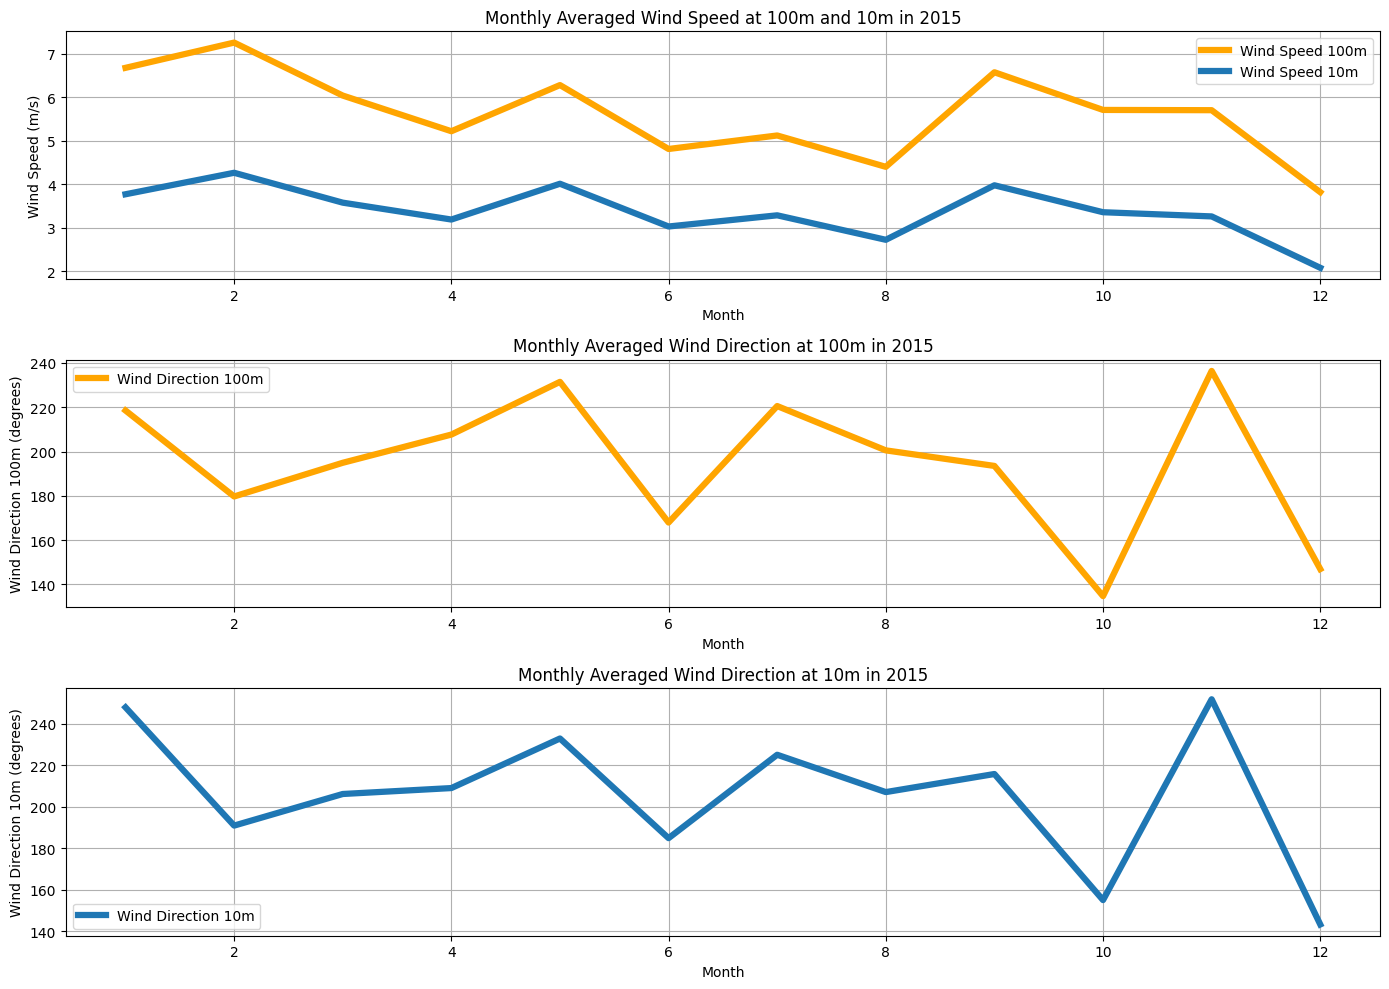

In [34]:
def plot_monthly_averages(year):
    # Extract data for the specified year
    year_data = select_year(year)
    
    # Extract month from 'period_end'
    year_data['month'] = year_data['period_end'].dt.month
    
    # Calculate monthly averages
    monthly_averages = year_data.groupby('month').mean(numeric_only=True)

    # Plot the data
    plt.figure(figsize=(14, 10))

    clear_blue = '#1f77b4'  
    # Plot wind speed
    plt.subplot(3, 1, 1)
    plt.plot(monthly_averages.index, monthly_averages['wind_speed_100m'], label='Wind Speed 100m', color='orange', linewidth=4.5)
    plt.plot(monthly_averages.index, monthly_averages['wind_speed_10m'], label='Wind Speed 10m', color=clear_blue, linewidth=4.5)
    plt.xlabel('Month')
    plt.ylabel('Wind Speed (m/s)')
    plt.title(f'Monthly Averaged Wind Speed at 100m and 10m in {year}')
    plt.grid(True)
    plt.legend()

    # Plot wind direction at 100m
    plt.subplot(3, 1, 2)
    plt.plot(monthly_averages.index, monthly_averages['wind_direction_100m'], label='Wind Direction 100m', color='orange', linewidth=4.5)
    plt.xlabel('Month')
    plt.ylabel('Wind Direction 100m (degrees)')
    plt.title(f'Monthly Averaged Wind Direction at 100m in {year}')
    plt.grid(True)
    plt.legend()

    # Plot wind direction at 10m
    plt.subplot(3, 1, 3)
    plt.plot(monthly_averages.index, monthly_averages['wind_direction_10m'], label='Wind Direction 10m', color=clear_blue, linewidth=4.5)
    plt.xlabel('Month')
    plt.ylabel('Wind Direction 10m (degrees)')
    plt.title(f'Monthly Averaged Wind Direction at 10m in {year}')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
    # Suppress SettingWithCopyWarning
    pd.options.mode.chained_assignment = None

plot_monthly_averages(2015)

<br>

## __Q6 : Plot the wind speed distribution at 10m and 100m above the ground__

### Function: wind_distribution

This function plots the distribution of wind speeds at 10 meters and 100 meters above the ground for a specified year.

- **Extract Yearly Data**: 
  Uses the `select_year` function to filter data for the specified year.

- **Plot Wind Speed Distribution at 10m**: 
  Creates a histogram showing the distribution of wind speeds at 10 meters height.

- **Plot Wind Speed Distribution at 100m**: 
  Creates a histogram showing the distribution of wind speeds at 100 meters height.

- **Layout Adjustment and Plot Display**: 
  Adjusts the layout for better spacing and displays the plots.

### Commentary on the Results for 2015

For the year 2015, the wind speed distribution shows a clear difference between wind speeds at 10 meters and 100 meters above the ground. The distribution at 10 meters (left plot) indicates that most wind speeds are clustered between 2 and 6 meters per second, with a noticeable drop-off beyond 6 meters per second. On the other hand, the distribution at 100 meters (right plot) shows a broader range of wind speeds, with a higher frequency of wind speeds around 5 to 10 meters per second. This suggests that wind speeds are generally higher and more variable at greater heights, which is important for optimizing wind turbine placement and performance.

### Example Usage

The example usage generates wind speed distribution plots for the year 2015:
```python
wind_distribution(2015)




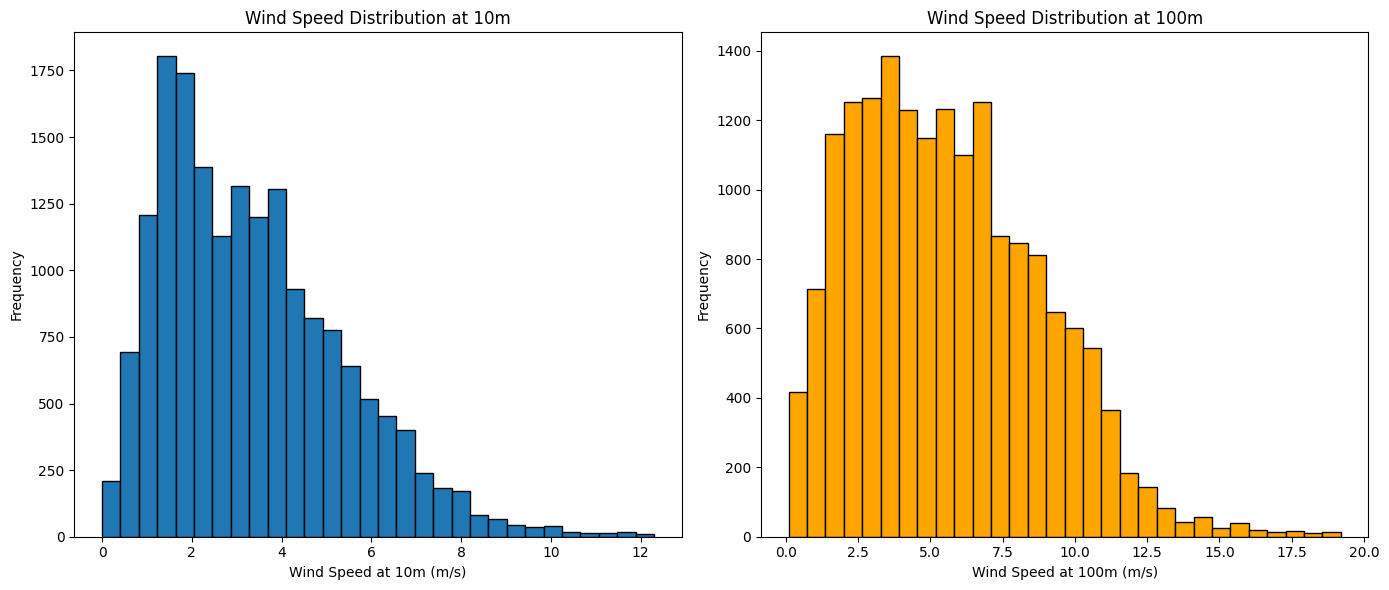

In [35]:
def wind_distribution(year):
    Df_one_year = select_year(year)
    #plot the wind speed distribution at 10m and 100m above the ground
    plt.figure(figsize=(14, 6))

    clear_blue = '#1f77b4'  
    light_grey = '#696969'
    #plot wind speed distribution at 10m
    plt.subplot(1, 2, 1)
    plt.hist(Df_one_year['wind_speed_10m'], bins=30, color=clear_blue, edgecolor='black')
    plt.xlabel('Wind Speed at 10m (m/s)')
    plt.ylabel('Frequency')
    plt.title('Wind Speed Distribution at 10m')

    #plot wind speed distribution at 100m
    plt.subplot(1, 2, 2)
    plt.hist(Df_one_year['wind_speed_100m'], bins=30, color='orange', edgecolor='black')
    plt.xlabel('Wind Speed at 100m (m/s)')
    plt.ylabel('Frequency')
    plt.title('Wind Speed Distribution at 100m')


    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

wind_distribution(2015)

<br>

## __Q7 : Find the parameters of the Weibull distribution that seems to fit best your data and plot it__

### What is the Weibull distribution ?

The Weibull distribution is a continuous probability distribution commonly used in reliability engineering, failure analysis, and weather data analysis. In the context of wind speed, the Weibull distribution is particularly useful because it can model the variability in wind speeds over time. It is defined by two parameters:

- Shape Factor (k): Describes the shape of the distribution. A higher k value indicates a more peaked distribution, while a lower k value indicates a more spread-out distribution.
- Scale Factor (c): Describes the scale of the distribution, which is related to the average wind speed. A higher c value indicates higher average wind speeds.


### Function: weibull_parameter

This function calculates and prints the Weibull distribution parameters for wind speed data at 10 meters and 100 meters above the ground for a specified year.

- **Extract Yearly Data**: 
  Uses the `select_year` function to filter data for the specified year.

- **Fit Weibull Distribution at 10m**: 
  Fits a Weibull distribution to the wind speed data at 10 meters height and prints the shape and scale factors.

- **Fit Weibull Distribution at 100m**: 
  Fits a Weibull distribution to the wind speed data at 100 meters height and prints the shape and scale factors.

### Function: weibull_plot

This function plots the wind speed distribution along with the fitted Weibull distribution for wind speeds at 10 meters and 100 meters above the ground for a specified year.

- **Extract Yearly Data**: 
  Uses the `select_year` function to filter data for the specified year.

- **Fit Weibull Distribution**: 
  Fits Weibull distributions to wind speed data at both 10 meters and 100 meters heights.

- **Plot Wind Speed Distribution and Weibull Fit at 10m**: 
  Creates a histogram of wind speeds at 10 meters height and overlays the Weibull probability density function (pdf).

- **Plot Wind Speed Distribution and Weibull Fit at 100m**: 
  Creates a histogram of wind speeds at 100 meters height and overlays the Weibull pdf.

- **Layout Adjustment and Plot Display**: 
  Adjusts the layout for better spacing and displays the plots.

### Example Usage

The example usage generates Weibull parameters and plots for the year 2015:
```python
weibull_parameter(2015)
weibull_plot(2015)


In [36]:
def weibull_parameter(year):
    Df_one_year = select_year(year)
    #fit Weibull distribution to wind speed data at 10m
    params_10m = stats.weibull_min.fit(Df_one_year['wind_speed_10m'], floc=0)
    shape_10m, _, scale_10m = params_10m
    print(f'Weibull distribution parameters for wind speed at 10m:')
    print(f'Shape factor k: {shape_10m}, Scale factor c: {scale_10m}')

    #fit Weibull distribution to wind speed data at 100m
    params_100m = stats.weibull_min.fit(Df_one_year['wind_speed_100m'], floc=0)
    shape_100m, _, scale_100m = params_100m
    print(f'\nWeibull distribution parameters for wind speed at 100m:')
    print(f'Shape factor k: {shape_100m}, Scale factor c: {scale_100m}')

weibull_parameter(2015)

Weibull distribution parameters for wind speed at 10m:
Shape factor k: 1.75454948284154, Scale factor c: 3.7953912538313093

Weibull distribution parameters for wind speed at 100m:
Shape factor k: 1.8056698569546983, Scale factor c: 6.323385171380794


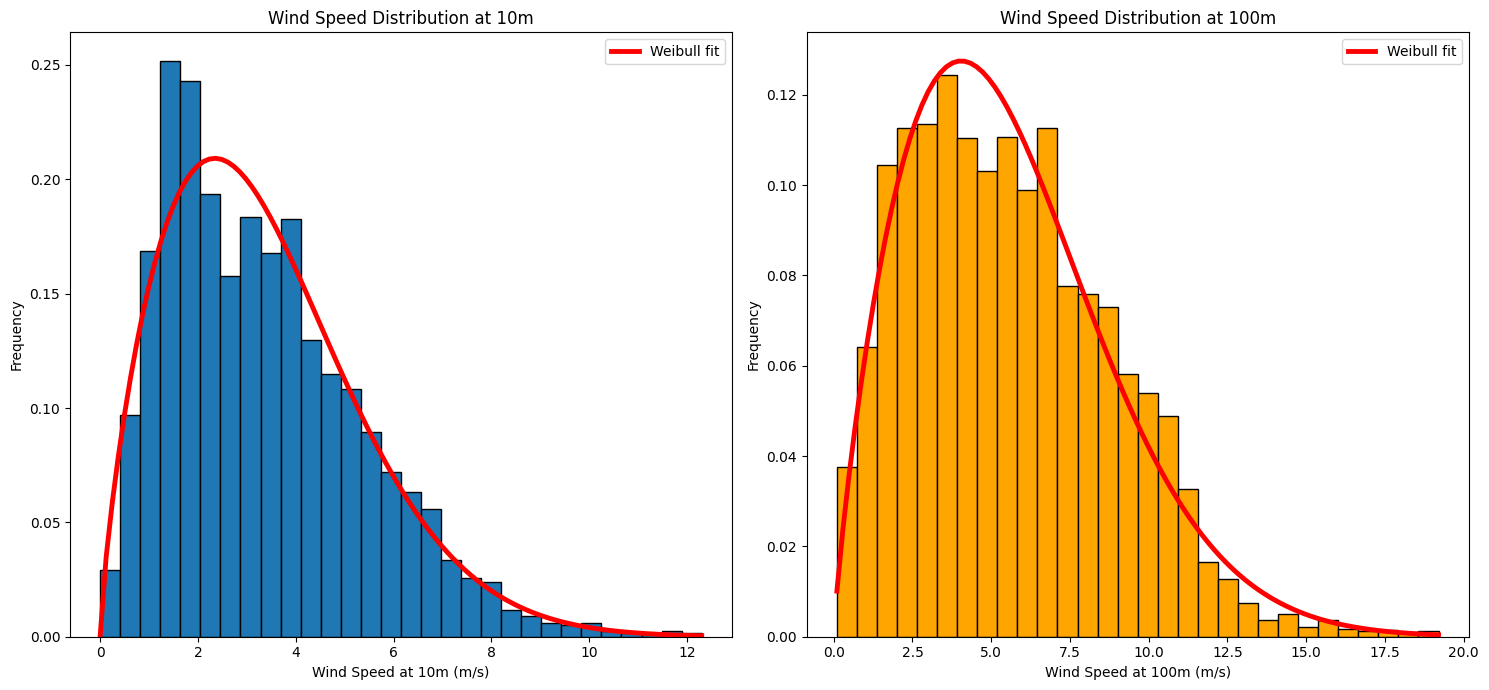

In [37]:
def weibull_plot(year):
    Df_one_year = select_year(year)
    #fit Weibull distribution to wind speed data at 10m
    params_10m = stats.weibull_min.fit(Df_one_year['wind_speed_10m'], floc=0)
    shape_10m, _, scale_10m = params_10m

    #fit Weibull distribution to wind speed data at 100m
    params_100m = stats.weibull_min.fit(Df_one_year['wind_speed_100m'], floc=0)
    shape_100m, _, scale_100m = params_100m

   
    plt.figure(figsize=(15, 7))

    # Plot wind speed distribution at 10m
    plt.subplot(1, 2, 1)
    count_10m, bins_10m, _ = plt.hist(Df_one_year['wind_speed_10m'], bins=30, density=True, edgecolor='black')
    x_10m = np.linspace(bins_10m[0], bins_10m[-1], 100)
    pdf_10m = stats.weibull_min.pdf(x_10m, shape_10m, loc=0, scale=scale_10m)
    plt.plot(x_10m, pdf_10m, 'r-', label='Weibull fit', linewidth=3.5)
    plt.xlabel('Wind Speed at 10m (m/s)')
    plt.ylabel('Frequency')
    plt.title('Wind Speed Distribution at 10m')
    plt.legend()

    # Plot wind speed distribution at 100m
    plt.subplot(1, 2, 2)
    count_100m, bins_100m, _ = plt.hist(Df_one_year['wind_speed_100m'], bins=30, density=True, edgecolor='black', color = 'orange')
    x_100m = np.linspace(bins_100m[0], bins_100m[-1], 100)
    pdf_100m = stats.weibull_min.pdf(x_100m, shape_100m, loc=0, scale=scale_100m)
    plt.plot(x_100m, pdf_100m, 'r-', label='Weibull fit', linewidth=3.5 )
    plt.xlabel('Wind Speed at 100m (m/s)')
    plt.ylabel('Frequency')
    plt.title('Wind Speed Distribution at 100m')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

weibull_plot(2015)


<br>

## __Open question : what is the effect of the wind direction, and how should you take that into account when installing your wind turbine?__

### Function: plot wind and speed

#### In the two polar plot we can have some important information about how to installing the wind turbine :

Based on the polar graphs, it is evident that wind direction significantly influences the energy production of wind turbines. At 100 meters, the wind direction predominantly from the north and northeast (0° to 45°) exhibits the highest wind speeds, with normalized values reaching up to approximately 1.0. In contrast, the wind speeds from the southeast (135° to 180°) are considerably lower, with normalized values around 0.3. This stark difference means that a turbine facing the north to northeast direction will produce significantly more energy compared to one facing the southeast direction. Specifically, the energy production potential in the optimal direction (north to northeast) is over three times greater than that in the least favorable direction (southeast). Therefore, aligning wind turbines to face the prevailing high-speed wind directions is crucial for maximizing energy output and ensuring efficient operation.

# ----------------------------------------------------------
# - __2nd Part : Comparative study of wind turbine models__ -
# ----------------------------------------------------------

<br>

## __Question 1 : Wind speed at the height of each turbine according to the wind log profile formula?__

### Function: speed_at_height

This function calculates wind speeds at specific heights above the ground for a specified year, using the log wind profile formula.

#### Parameters and Constants

- **Von Kármán constant (k)**: Set to 0.41, this is a dimensionless constant used in boundary-layer meteorology.

- **Roughness Length (z0)**: Set to 1.5 meters, which is a typical value for mixed urban and rural areas. Nimes has a varied landscape, so this value is a reasonable estimate.

- **Displacement Height (d)**: Set to 11.25 meters. This value is estimated as a fraction of the average building height in Nimes, around 15 meters, using the formula \( \frac{3}{4} \times 15 \).

#### Heights of Wind Turbines

- **Alstom_ECO122**: 89 meters
- **Enercon_E33**: 50 meters
- **Aventa_AV7**: 18 meters

#### Formulas Used

- **Friction Velocity (u*)**

- **Log Wind Profile Formula**

#### Function Process

1. **Extract Yearly Data**: Uses the `select_year` function to filter data for the specified year.
2. **Calculate Friction Velocity (\( u* \))**: Uses the reference wind speed at 100 meters to compute \( u* \).
3. **Calculate Wind Speed at Specific Heights**: Iterates over the turbine heights and calculates wind speed using the log wind profile formula.
4. **Return Modified DataFrame**: The function returns the DataFrame with additional columns for wind speeds at the specified turbine heights.

### Example Usage

The example usage calculates wind speeds at specified heights for the year 2015:
```python
speed_at_height(2015)
```

### Explanation of Choices for z0 and d

- Roughness Length (z0 = 1.5 meters): This value typically ranges from 0.1 to 5 meters, depending on the surface roughness. Given the mixed nature of Nimes, with both urban and rural features, 1.5 meters is chosen as a representative value.

- Displacement Height (d = 11.25 meters): This is calculated as a fraction of the average building height in Nimes. Urban areas typically have displacement heights that are a significant fraction of the average building height, so 34×1543​×15 meters provides a reasonable estimate.



In [38]:
def speed_at_height(year):
    Df_one_year = select_year(year)
    k = 0.41   #Von Kármán constant
    
    z0 = 1.5   #𝑧0 typically ranges from 0.1 to 5 meters. 
               #Considering the mixed nature of Nimes, let's choose a value around 1.5
    
    d = 11.25  #Given the urban nature of Nimes, we can estimate d
               #as a fraction of the average building height. 
               #This could be around 10 to 20 meters so 3/4 * 15.

    #Heights of the wind turbines
    heights = {
        'Alstom_ECO122': 89, #https://en.wind-turbine-models.com/turbines/629-alstom-eco-122-2700
        'Enercon_E33': 50, #https://en.wind-turbine-models.com/turbines/369-enercon-e-30-330
        'Aventa_AV7': 18 #https://en.wind-turbine-models.com/turbines/1529-aventa-av-7
    }

    #calculate friction velocity (u*) using the reference wind speed at 100m
    #friction velocity = u0 * k / ln(100-d)/z0
    Df_one_year.loc[:, 'u_star'] = Df_one_year['wind_speed_100m'] * k / np.log((100 - d) / z0)

    #calculate wind speed at specific heights using the log profile formula 
    #log profile formula : u* / k * ln(h-d)/z0
    for turbine, height in heights.items():
        Df_one_year.loc[:, turbine] = Df_one_year['u_star'] / k * np.log((height - d) / z0)

    return Df_one_year

speed_at_height(2015)


,wind_direction_100m,wind_direction_10m,wind_speed_100m,wind_speed_10m,period_end,u_star,Alstom_ECO122,Enercon_E33,Aventa_AV7
17519,14,9,8.4,4.5,2015-01-01 00:00:00+00:00,0.844044,8.127590,6.694018,3.096358
17520,13,8,8.4,4.5,2015-01-01 00:30:00+00:00,0.844044,8.127590,6.694018,3.096358
17521,9,5,8.2,4.5,2015-01-01 01:00:00+00:00,0.823947,7.934076,6.534636,3.022635
17522,9,5,8.0,4.4,2015-01-01 01:30:00+00:00,0.803851,7.740562,6.375255,2.948912
17523,10,7,7.7,4.3,2015-01-01 02:00:00+00:00,0.773707,7.450291,6.136183,2.838328
...,...,...,...,...,...,...,...,...,...
34987,146,139,5.2,2.2,2015-12-30 22:00:00+00:00,0.522503,5.031365,4.143916,1.916793
34988,145,137,5.2,2.2,2015-12-30 22:30:00+00:00,0.522503,5.031365,4.143916,1.916793
34989,146,137,5.3,2.3,2015-12-30 23:00:00+00:00,0.532551,5.128122,4.223607,1.953654
34990,144,135,5.4,2.4,2015-12-30 23:30:00+00:00,0.542599,5.224880,4.303297,1.990516


<br>

## __Question 2 : Number of operating hours, the total power production in kWh/year and the capacity factor with each wind turbine model?__

### Function: power_features

This function calculates various power-related features for different types of wind turbines over a specified year. 

#### Power Curves

The power curves for the turbines were obtained online.
The power curves represent the power output of wind turbines at different wind speeds:

- **Alstom ECO122**: The power curve values range from 0 kW at low wind speeds to 2700 kW at optimal wind speeds.
- **Enercon E33**: The power curve values range from 0 kW at low wind speeds to 335 kW at optimal wind speeds.
- **Aventa AV7**: The power curve values range from 0.1 kW at low wind speeds to 6.2 kW at optimal wind speeds.

#### Function Process

1. **Extract Wind Speed Data**: 
   Uses the `speed_at_height` function to calculate wind speeds at different heights for the specified year.

2. **Power Production Calculation**: 
   Applies the power curves to the wind speeds to calculate the power produced by each turbine type at each time period.

3. **Monthly Power Production and Capacity Factors**:
   - Calculates the total power produced each month.
   - Computes the capacity factor, which is the ratio of actual power produced to the maximum possible power output.

4. **Total Annual Power Production and Capacity Factors**:
   - Calculates the total power produced over the year.
   - Computes the capacity factor for the entire year.

5. **Operating Hours**:
   - Determines the number of hours each turbine was producing power.

6. **Display Results**:
   - Prints the operating hours, total power production, and capacity factors for each turbine.

### Example Usage

The example usage calculates power features for the year 2022:
```python
power_features(2022)
```

### Key Outputs

- Operating Hours: The number of hours each turbine type was operational during the year.
- Total Power Production: The total amount of electricity generated by each turbine type over the year.
- Capacity Factor: The efficiency of each turbine type, expressed as a percentage of its maximum potential output.

In [39]:
def power_features(year):
    Df_one_year = speed_at_height(year)
    
    # Power curves for the turbines
    power_curve_alstom = {
        1: 0, 2: 0, 3: 29, 4: 171, 5: 389, 6: 703, 7: 1139, 8: 1682, 9: 2205, 10: 2541,
        11: 2669, 12: 2697, 13: 2700, 14: 2700, 15: 2700, 16: 2700, 17: 2700, 18: 2700,
        19: 2700, 20: 2700, 21: 2700, 22: 2700, 23: 2700, 24: 2700, 25: 2700, 26: 0,
        27: 0, 28: 0, 29: 0, 30: 0
    }

    power_curve_enercon = {
        1: 0, 2: 0, 3: 5, 4: 13.7, 5: 30, 6: 55, 7: 92, 8: 138, 9: 196, 10: 250,
        11: 292.8, 12: 320, 13: 335, 14: 335, 15: 335, 16: 335, 17: 335, 18: 335,
        19: 335, 20: 335, 21: 335, 22: 335, 23: 335, 24: 335, 25: 335, 26: 0,
        27: 0, 28: 0, 29: 0, 30: 0
    }

    power_curve_aventa = {
        1: 0, 2: 0.1,  3: 0.7,  4: 1.5,  5: 3.1,  6: 5.8,  7: 6.2,  8: 6.2,  9: 6.2, 10: 6.2,
        11: 6.2, 12: 6.2, 13: 6.2, 14: 6.2, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0,
        21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0
    }

    # Add power production columns based on the power curves
    def get_power(wind_speed, power_curve):
        wind_speed = round(wind_speed)
        return power_curve.get(wind_speed, 0)

    Df_one_year['power_Alstom_ECO122'] = Df_one_year['Alstom_ECO122'].apply(lambda x: get_power(x, power_curve_alstom))
    Df_one_year['power_Enercon_E33'] = Df_one_year['Enercon_E33'].apply(lambda x: get_power(x, power_curve_enercon))
    Df_one_year['power_Aventa_AV7'] = Df_one_year['Aventa_AV7'].apply(lambda x: get_power(x, power_curve_aventa))

    Df_one_year['month'] = Df_one_year['period_end'].dt.month

    # Calculate monthly power production and capacity factors
    monthly_power_alstom = Df_one_year.groupby('month')['power_Alstom_ECO122'].sum() * 0.5
    monthly_power_enercon = Df_one_year.groupby('month')['power_Enercon_E33'].sum() * 0.5
    monthly_power_aventa = Df_one_year.groupby('month')['power_Aventa_AV7'].sum() * 0.5

    rated_power_alstom = 2700  # kW
    rated_power_enercon = 335  # kW
    rated_power_aventa = 6.2  # kW
    hours_in_month = 730  # Approximate number of hours in a month

    monthly_capacity_factor_alstom = monthly_power_alstom / (rated_power_alstom * hours_in_month)
    monthly_capacity_factor_enercon = monthly_power_enercon / (rated_power_enercon * hours_in_month)
    monthly_capacity_factor_aventa = monthly_power_aventa / (rated_power_aventa * hours_in_month)

    # Calculate total power production in kWh/year for each turbine
    total_power_alstom = Df_one_year['power_Alstom_ECO122'].sum() * 0.5  # Each time period is 0.5 hours
    total_power_enercon = Df_one_year['power_Enercon_E33'].sum() * 0.5
    total_power_aventa = Df_one_year['power_Aventa_AV7'].sum() * 0.5

    # Calculate capacity factor for each turbine
    capacity_factor_alstom = total_power_alstom / (rated_power_alstom * 8760)  # 8760 hours in a year
    capacity_factor_enercon = total_power_enercon / (rated_power_enercon * 8760)
    capacity_factor_aventa = total_power_aventa / (rated_power_aventa * 8760)                       

    # Calculate operating hours for each turbine
    operating_hours_alstom = (Df_one_year['power_Alstom_ECO122'] > 0).sum() * 0.5  # Each time period is 0.5 hours
    operating_hours_enercon = (Df_one_year['power_Enercon_E33'] > 0).sum() * 0.5
    operating_hours_aventa = (Df_one_year['power_Aventa_AV7'] > 0).sum() * 0.5

    # Display the results
    print(f"Alstom ECO122 Operating Hours: {operating_hours_alstom:.2f} hours")
    print(f"Alstom ECO122 Total Power Production: {total_power_alstom:.2f} kWh/year")
    print(f"Alstom ECO122 Capacity Factor: {capacity_factor_alstom * 100:.2f}%")

    print(f"\nEnercon E33 Operating Hours: {operating_hours_enercon:.2f} hours")
    print(f"Enercon E33 Total Power Production: {total_power_enercon:.2f} kWh/year")
    print(f"Enercon E33 Capacity Factor: {capacity_factor_enercon * 100:.2f}%")

    print(f"\nAventa AV7 Operating Hours: {operating_hours_aventa:.2f} hours")
    print(f"Aventa AV7 Total Power Production: {total_power_aventa:.2f} kWh/year")
    print(f"Aventa AV7 Capacity Factor: {capacity_factor_aventa * 100:.2f}%")

    return Df_one_year, monthly_capacity_factor_alstom, monthly_capacity_factor_enercon, monthly_capacity_factor_aventa, total_power_alstom, total_power_enercon, total_power_aventa

power_features(2022)

Alstom ECO122 Operating Hours: 7061.50 hours
Alstom ECO122 Total Power Production: 6759206.50 kWh/year
Alstom ECO122 Capacity Factor: 28.58%

Enercon E33 Operating Hours: 6391.50 hours
Enercon E33 Total Power Production: 357263.10 kWh/year
Enercon E33 Capacity Factor: 12.17%

Aventa AV7 Operating Hours: 5462.50 hours
Aventa AV7 Total Power Production: 3257.30 kWh/year
Aventa AV7 Capacity Factor: 6.00%


(        wind_direction_100m  wind_direction_10m  wind_speed_100m  \
 140255                  356                 342              3.1   
 140256                  357                 343              3.4   
 140257                  359                 346              3.7   
 140258                  360                 344              3.6   
 140259                  359                 334              3.2   
 ...                     ...                 ...              ...   
 157723                   14                   0              2.8   
 157724                   12                   2              3.2   
 157725                   24                  10              3.3   
 157726                   33                  15              3.5   
 157727                   39                  17              3.7   
 
         wind_speed_10m                period_end    u_star  Alstom_ECO122  \
 140255             1.5 2022-01-01 00:00:00+00:00  0.311492       2.999468   
 140256       

<br>

## __Question 3 : Plot the capacity factor as a function of the month, and the year__

### Functions: collect_data_for_all_years and plot_capacity_factor_all_years

These functions are used to collect and visualize the capacity factors of different wind turbines over a range of years. 

#### Function: collect_data_for_all_years

This function gathers data on the monthly capacity factors of various wind turbines from the start year to the end year, excluding the year 2024.

**Process:**

1. **Initialization:**
   - An empty list `monthly_data` is initialized to store monthly capacity factors for each year.

2. **Loop Through Each Year:**
   - The function iterates over each year from `start_year` to `end_year`.
   - For each year, it skips the year 2024 by using a conditional statement.
   - Calls the `power_features` function to calculate power-related metrics for the given year.

3. **Extract Monthly Capacity Factors:**
   - The function extracts the monthly capacity factors for each turbine type (Alstom ECO122, Enercon E33, Aventa AV7) and stores them in a DataFrame `monthly_capacity_factors`.
   - This DataFrame includes columns for the month, capacity factors for each turbine type, and the year.

4. **Append to List:**
   - The monthly capacity factors DataFrame for each year is appended to the `monthly_data` list.

5. **Concatenate DataFrames:**
   - All yearly DataFrames are concatenated into a single DataFrame `monthly_df`.

6. **Return DataFrame:**
   - The function returns the `monthly_df` containing monthly capacity factors for all years.

**Example Usage:**

```python
monthly_df = collect_data_for_all_years(2014, 2023)
```

Alstom ECO122 Operating Hours: 7285.00 hours
Alstom ECO122 Total Power Production: 6932127.50 kWh/year
Alstom ECO122 Capacity Factor: 29.31%

Enercon E33 Operating Hours: 6687.00 hours
Enercon E33 Total Power Production: 383264.60 kWh/year
Enercon E33 Capacity Factor: 13.06%

Aventa AV7 Operating Hours: 5779.00 hours
Aventa AV7 Total Power Production: 3649.55 kWh/year
Aventa AV7 Capacity Factor: 6.72%
Alstom ECO122 Operating Hours: 7057.50 hours
Alstom ECO122 Total Power Production: 7121483.50 kWh/year
Alstom ECO122 Capacity Factor: 30.11%

Enercon E33 Operating Hours: 6438.00 hours
Enercon E33 Total Power Production: 397898.20 kWh/year
Enercon E33 Capacity Factor: 13.56%

Aventa AV7 Operating Hours: 5535.00 hours
Aventa AV7 Total Power Production: 3835.25 kWh/year
Aventa AV7 Capacity Factor: 7.06%
Alstom ECO122 Operating Hours: 7380.00 hours
Alstom ECO122 Total Power Production: 7551750.50 kWh/year
Alstom ECO122 Capacity Factor: 31.93%

Enercon E33 Operating Hours: 6852.00 hours
Enerc

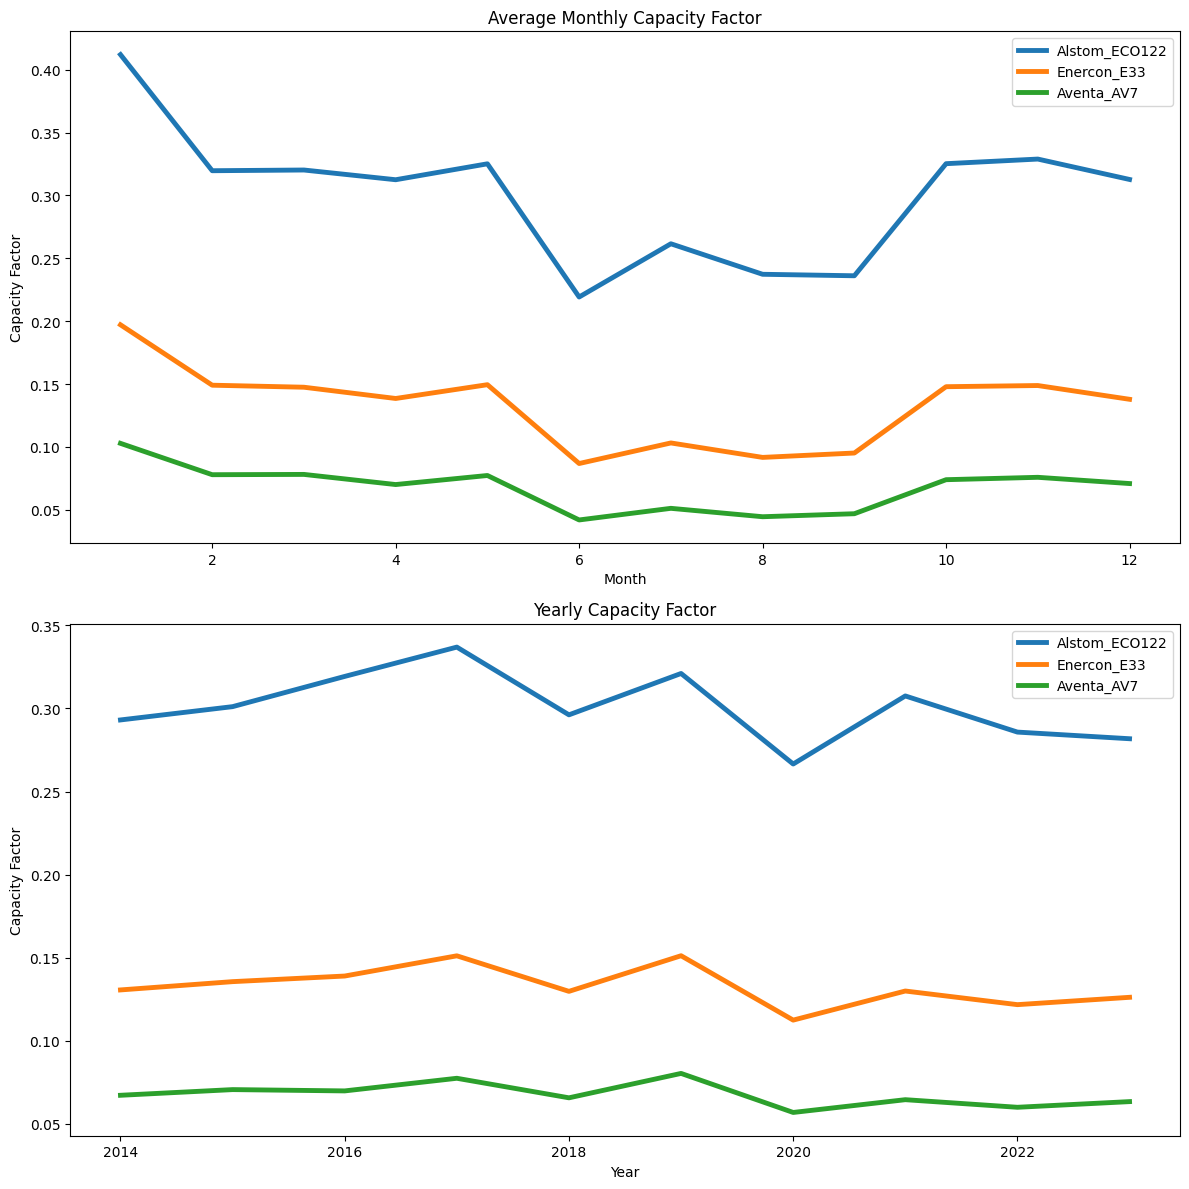

In [40]:
def collect_data_for_all_years(start_year, end_year):
    monthly_data = []

    for year in range(start_year, end_year + 1):
        if year == 2024:
            continue
        Df_one_year, monthly_capacity_factor_alstom, monthly_capacity_factor_enercon, monthly_capacity_factor_aventa,_,_,_ = power_features(year)
        monthly_capacity_factors = pd.DataFrame({
            'month': monthly_capacity_factor_alstom.index,
            'Alstom_ECO122': monthly_capacity_factor_alstom.values,
            'Enercon_E33': monthly_capacity_factor_enercon.values,
            'Aventa_AV7': monthly_capacity_factor_aventa.values,
            'year': year
        })
        monthly_data.append(monthly_capacity_factors)

    monthly_df = pd.concat(monthly_data)
    return monthly_df

def plot_capacity_factor_all_years(start_year, end_year):
    monthly_df = collect_data_for_all_years(start_year, end_year)

    fig, axs = plt.subplots(2, 1, figsize=(12, 12))

    for turbine in ['Alstom_ECO122', 'Enercon_E33', 'Aventa_AV7']:
        monthly_avg = monthly_df.groupby('month')[turbine].mean()
        axs[0].plot(monthly_avg.index, monthly_avg.values, label=turbine, linewidth=3.5)
    axs[0].set_title('Average Monthly Capacity Factor')
    axs[0].set_xlabel('Month')
    axs[0].set_ylabel('Capacity Factor')
    axs[0].legend()

    yearly_avg = monthly_df.groupby('year').mean().reset_index()
    for turbine in ['Alstom_ECO122', 'Enercon_E33', 'Aventa_AV7']:
        axs[1].plot(yearly_avg['year'], yearly_avg[turbine], label=turbine, linewidth=3.5)
    axs[1].set_title('Yearly Capacity Factor')
    axs[1].set_xlabel('Year')
    axs[1].set_ylabel('Capacity Factor')
    axs[1].legend()

    plt.tight_layout()
    plt.show()


plot_capacity_factor_all_years(2014, 2023)


# -----------------------------
# - __3rd Part : open questions__ -
# -----------------------------

<br>

## __Question 1 : How many turbine of each type to power Nimes ?__

Nimes annual consumption is 322652 MWh

The program below perfom this computation :
It calculates the number of wind turbines needed to meet Nimes' annual energy demand of 322,652 MWh. It first retrieves the annual energy production for each turbine type (Alstom ECO122, Enercon E33, and Aventa AV7) for the year 2023 using the power_features function. Then, it computes how many of each turbine type are required by dividing the total energy demand by the annual production per turbine and rounding up to the nearest whole number.


In [41]:
#define the energy demand of Nimes in MWh per year
annual_energy_demand_mwh = 322652

#get the annual energy production for each type of turbine
_,_,_,_, total_power_alstom, total_power_enercon, total_power_aventa = power_features(2023)

#calculate the number of turbines needed for each type
num_turbines_alstom = np.ceil(annual_energy_demand_mwh * 1000 / total_power_alstom)
num_turbines_enercon = np.ceil(annual_energy_demand_mwh * 1000 / total_power_enercon)
num_turbines_aventa = np.ceil(annual_energy_demand_mwh * 1000 / total_power_aventa)

print(f"\nNumber of Alstom ECO122 turbines needed: {num_turbines_alstom}")
print(f"Number of Enercon E33 turbines needed: {num_turbines_enercon}")
print(f"Number of Aventa AV7 turbines needed: {num_turbines_aventa}")


Alstom ECO122 Operating Hours: 6924.50 hours
Alstom ECO122 Total Power Production: 6664661.50 kWh/year
Alstom ECO122 Capacity Factor: 28.18%

Enercon E33 Operating Hours: 6329.00 hours
Enercon E33 Total Power Production: 370226.80 kWh/year
Enercon E33 Capacity Factor: 12.62%

Aventa AV7 Operating Hours: 5467.00 hours
Aventa AV7 Total Power Production: 3442.45 kWh/year
Aventa AV7 Capacity Factor: 6.34%

Number of Alstom ECO122 turbines needed: 49.0
Number of Enercon E33 turbines needed: 872.0
Number of Aventa AV7 turbines needed: 93728.0


#


</br>

## __Question 2 : Choosing the Optimal Wind Turbines for Nimes__


__To power the city of Nimes with wind turbines, we need to consider cost, feasibility, and urban constraints. Here's an analysis of the three types of turbines:__

### __Alstom ECO122__
- Number Needed: 49
- Initial Cost: $1,470,000,000
- Annual Maintenance Cost: $4,900,000
- Advantages: High capacity, fewer turbines needed, efficient land use.
- Disadvantages: High initial cost, significant visual impact.

### __Enercon E33__
- Number Needed: 872
- Initial Cost: $872,000,000
- Annual Maintenance Cost: $21,800,000
- Advantages: Moderate cost, less visually intrusive.
- Disadvantages: More turbines required, higher cumulative maintenance costs.

### __Aventa AV7__
- Number Needed: 93,728
- Initial Cost: $937,280,000
- Annual Maintenance Cost: $23,432,000
- Advantages: Low cost per turbine.
- Disadvantages: Impractical in urban settings due to the vast number required, significant land use, and high visual impact.

### __Recommendation__

Alstom ECO122 turbines are the optimal choice for Nimes. They require fewer units, making them more suitable for urban areas, and despite the higher initial cost, they offer better long-term feasibility and efficiency.

</br>
</br>

## __Question 3 : what storage capacity should Nimes install to deal with periods without wind?__

### First we need to estimate what is the longer period withoit wind

The program below perfom this computation :

1. The program looks at wind data for a whole year.
2. It checks when the wind is blowing very slowly (less than 3 meters per second).
3. It counts how many hours each day the wind is blowing slowly.
4. If a day has more than 16 hours of slow wind, it marks that day as a no-wind day.
5. Finally, it finds and prints the longest stretch of days in a row where there was mostly no wind.

I chose a wind speed threshold of 3 meters per second and considered a day as "without wind" if it had more than 16 hours below this threshold because these conditions lead to minimal energy production. At 3 m/s, the Alstom ECO122 turbine produces only 29 kW (1% of its maximum capacity), the Enercon E33 produces 5 kW (1.5%), and the Aventa AV7 produces 0.7 kW (11%). This output is negligible and near to no production. Additionally, a day with more than 16 hours of low wind leaves only 8 hours for potential energy generation, which is insufficient for reliable energy production. Therefore, these thresholds help us accurately identify unproductive days and plan our energy storage needs to ensure a consistent power supply.

### Now we need to understand how much those day represent in MWh 

Her for exemple it's 5 days of "non-blowing", and we know that the average consumption in Nimes for 1 day -> 884MWh
and 884 * 5 = 4,420MWh 

### What 4,420MWH represents ?

4,420MWh is enormous ! Indeed the world's largest battery is "Moss Landing Energy Storage Facility of California" : 3,000 MWh capacity. 
But we know that a battery park of this size is extremely expensive and takes up a lot of space. So it's not a viable solution for the city of Nimes today. What's more, lithium batteries often burn out (https://sciencepost.fr/moss-landing-packs-de-batteries-incendies/). Perhaps in the future this could be a viable solution.

In [42]:
def num_day_blowing_threshold(year, threshold=3):
    Df_one_year = select_year(year)
    
    # Filter rows where both wind speeds are below the threshold
    Df_one_year['no_wind'] = (Df_one_year['wind_speed_100m'] < threshold) & (Df_one_year['wind_speed_10m'] < threshold)

    # Convert period_end to date to group by day
    Df_one_year['date'] = Df_one_year['period_end'].dt.date

    # Group by date and calculate hours without wind
    daily_no_wind_hours = Df_one_year.groupby('date')['no_wind'].sum().reset_index()
    
    # Convert half-hour periods to hours
    daily_no_wind_hours['no_wind_hours'] = daily_no_wind_hours['no_wind'] * 0.5

    # Determine if a day is considered "without wind"
    daily_no_wind_hours['no_wind_day'] = daily_no_wind_hours['no_wind_hours'] > 16

    # Find the longest consecutive sequence of days with no wind
    max_consecutive_days = 0
    current_streak = 0
    
    for _, row in daily_no_wind_hours.iterrows():
        if row['no_wind_day']:
            current_streak += 1
            if current_streak > max_consecutive_days:
                max_consecutive_days = current_streak
        else:
            current_streak = 0

    print(f'The maximum number of consecutive days without wind (below {threshold} m/s for more than 15 hours) in the year {year}: {max_consecutive_days} days')

    return max_consecutive_days

# Example usage
num_day_blowing_threshold(2020)


The maximum number of consecutive days without wind (below 3 m/s for more than 15 hours) in the year 2020: 5 days


5